# ZADANIE 1

a) Wykonaj poniższy skrypt i przeanalizuj go:

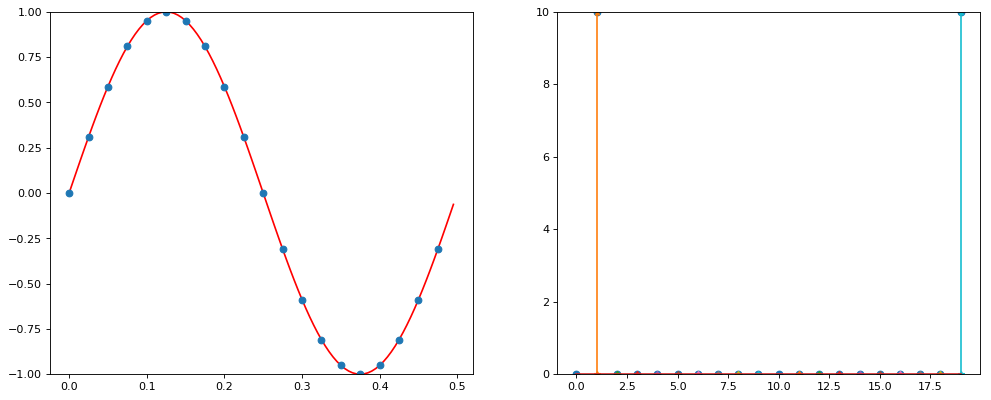

In [107]:
from __future__ import division
from pylab import *
from numpy import *
from scipy import *
from ipywidgets import *
import math as mt

%matplotlib inline

A = 1
# Amplituda sygnału

LP = 1 
# Liczba analizowanych pełnych przebiegów sygnału (okresów)
w = 40           
# czśstotliwość probkowania [Hz] sygnału 
#(jak często w ciągu sekundy pobieramy informacje o wartości sygnału)

f = 2.0           
# Czestotliwosc sygnalu [Hz]

T = 1.0/f        
# Okres sygnalu [s] (jak długo trwa jeden przebieg sinusa)

TW = 1.0/w        
# Okres probkowania [s] (co ile sekund pobieramy próbkę)

t = np.arange(0, LP*T, TW)
# generujemy momenty, w których pobieramy próbki

n = len(t)
    
FUNC = lambda t : A*sin(2*pi*t*f)    
# def. funkcji (tutaj sinus)

signal = FUNC(t)                 
# funkcja sprobkowana

fig = plt.figure(figsize=(15, 6), dpi=80)   
ax = fig.add_subplot(121)
## --- POMOCNICZY SYGNAL
base_t = np.arange(0, LP*T, 1.0/200.0)
base_signal = FUNC(base_t)
ax.plot(base_t, base_signal, linestyle='-', color='red')
ax.set_ylim([min(base_signal), max(base_signal)])
## --- 
ax.plot(t, signal, 'o')

signal1 = fft(signal)
# sygnal w dziedzinie czestotliwosci 
signal1 = abs(signal1)        
# modul sygnalu

freqs = range(int(n))


ax = fig.add_subplot(122)
ymax = max(signal1)
if (ymax > 3.0):
    ax.set_ylim([0.0,ymax])
else:
    ax.set_ylim([0.0,3.0])
stem(freqs, signal1, '-*')

show()

UWAGA: do dalszych ćwiczeń warto powyższy skrypt przekształcić na funkcję o wielu argumentach, typu: amplituda, częstotliwość próbkowania, liczba przebiegów. Oczywiście dla wygody, należy nadać wartości domyślne argumentom funkcji.

In [108]:
# Zdefiniuj funckję
def makeSignal(A=1, LP=1, w=40, f=2.0):
    T = 1.0/f        
    TW = 1.0/w        
    t = np.arange(0, LP*T, TW)
    n = len(t)

    FUNC = lambda t : A*sin(2*pi*t*f)    

    signal = FUNC(t)         
    fig = plt.figure(figsize=(15, 6), dpi=80)   
    ax = fig.add_subplot(121)
    ## --- POMOCNICZY SYGNAL
    base_t = np.arange(0, LP*T, 1.0/200.0)
    base_signal = FUNC(base_t)
    ax.plot(base_t, base_signal, linestyle='-', color='red')
    ax.set_ylim([min(base_signal), max(base_signal)])
    ## --- 
    ax.plot(t, signal, 'o')

    signal1 = fft(signal)
    # sygnal w dziedzinie czestotliwosci 
    signal1 = abs(signal1)        
    # modul sygnalu

    freqs = range(int(n))

    ax = fig.add_subplot(122)
    ymax = max(signal1)
    if (ymax > 3.0):
        ax.set_ylim([0.0,ymax])
    else:
        ax.set_ylim([0.0,3.0])
    stem(freqs, signal1, '-*')
    
    ax.set_xlabel("Czestotliwosc")
    ax.set_ylabel("Amplituda")

    show()


UWAGA DLA CHĘTNYCH: można wykorzystać 'interact', dzięki któremu można zmieniac parametry danej funkcji i na bieżąco obserwować zmiany. Poniższy kod przedstawia sposób wykorzystania interact:

In [109]:
from ipykernel.pylab.backend_inline import flush_figures

def prosta(a=2, b=0):
    x = linspace(-5, 5, 100, endpoint=False) # punkty na osi OX [s]
    f = lambda x : a*x + b
    y = f(x)   
    
    fig = plt.figure(figsize=(6, 3), dpi=80)
    ax = fig.add_subplot(111)
    ax.set_xlim(-5, 5)
    ax.set_ylim(-5, 5)
    ax.plot(x, y)
    flush_figures()
    
interact(prosta, a=(-5,5,0.5), b=(-5,5,0.5))
    

aW50ZXJhY3RpdmUoY2hpbGRyZW49KEZsb2F0U2xpZGVyKHZhbHVlPTIuMCwgZGVzY3JpcHRpb249dSdhJywgbWF4PTUuMCwgbWluPS01LjAsIHN0ZXA9MC41KSwgRmxvYXRTbGlkZXIodmFsdWXigKY=


<function __main__.prosta>

b) Zmień częstotliwość próbkowania na 50Hz.

In [110]:
interact(makeSignal, A=(1,5,0.5), f=(0.5,2.5,0.1), w=(10,100,10),
        LP=(1,10,1))

aW50ZXJhY3RpdmUoY2hpbGRyZW49KEZsb2F0U2xpZGVyKHZhbHVlPTEuMCwgZGVzY3JpcHRpb249dSdBJywgbWF4PTUuMCwgbWluPTEuMCwgc3RlcD0wLjUpLCBJbnRTbGlkZXIodmFsdWU9MSzigKY=


<function __main__.makeSignal>

c) Punkty na osi OX spektrum są teraz kolejnymi liczbami naturalnymi, a nie częstotliwościami w Hz. Popraw skrypt (funkcje), tak aby oś OX spektrum była w Hz (podpowiedź: oś OX rozpoczyna się od 0Hz, a kończy się na (prawie!)  Hz, gdzie  jest częstotliwością próbkowania). Następnie: Upewnij się, że spektrum dla 1Hz-owego sinusa i pięciu (LP=5) analizowanych przebiegów wygląda teraz prawidłowo.

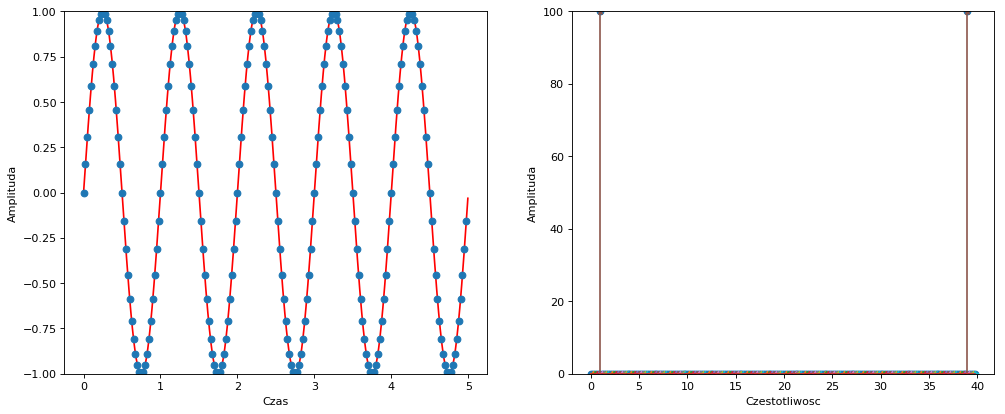

In [111]:
# popraw oś OX
def makeSignal(A=1, LP=1, w=40, f=2.0):
    T = 1.0/f        
    TW = 1.0/w        
    t = np.arange(0, LP*T, TW)
    n = len(t)

    FUNC = lambda t : A*sin(2*pi*t*f)    

    signal = FUNC(t)         
    fig = plt.figure(figsize=(15, 6), dpi=80)   
    ax = fig.add_subplot(121)
    ## --- POMOCNICZY SYGNAL
    base_t = np.arange(0, LP*T, 1.0/200.0)
    base_signal = FUNC(base_t)
    ax.plot(base_t, base_signal, linestyle='-', color='red')
    ax.set_ylim([min(base_signal), max(base_signal)])
    ## --- 
    ax.plot(t, signal, 'o')

    ax.set_xlabel("Czas")
    ax.set_ylabel("Amplituda")
    
    signal1 = fft(signal)
    # sygnal w dziedzinie czestotliwosci 
    signal1 = abs(signal1) 
    # modul sygnalu

    freqs = np.arange(int(n))
    freqs = [x*w/n for x in freqs]


    ax = fig.add_subplot(122)
    ymax = max(signal1)
    if (ymax > 3.0):
        ax.set_ylim([0.0,ymax])
    else:
        ax.set_ylim([0.0,3.0])
    stem(freqs, signal1, '-*')
    
    ax.set_xlabel("Czestotliwosc")
    ax.set_ylabel("Amplituda")

    show()

makeSignal(f=1.0, LP=5)


d) Podpisz osie obu wykresów, używając funkcji xlabel() i ylabel(). Pamiętaj o jednostkach.

In [112]:
# Podpisz osie wykresów

f) Porównaj spektrum funkcji $sin(2*pi*f*t)$, $2*sin(2*pi*f*t)$ i $3*sin(2*pi*f*t)$. Jak zmienia się wartość na osi OY na wykresie spektrum?

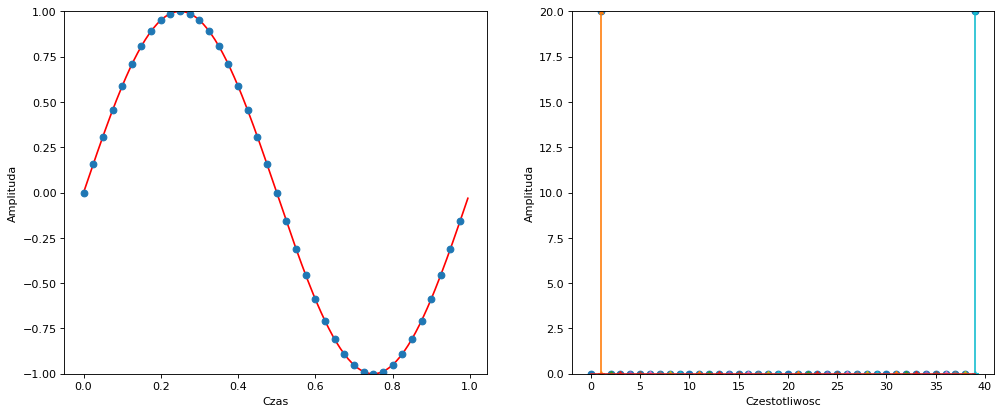

In [113]:
# f=1, A=1, LP=1
makeSignal(f=1.0,A=1.0,LP=1.0)

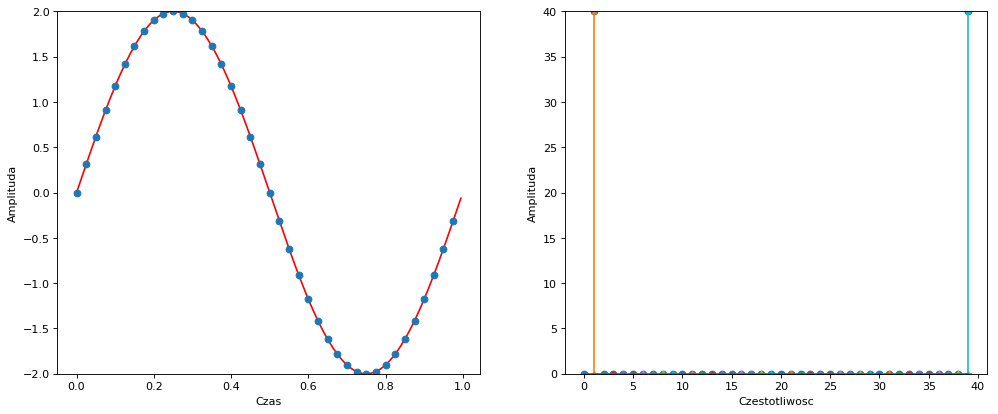

In [114]:
# f=1, A=2, LP=1
makeSignal(f=1.0,A=2.0,LP=1.0)

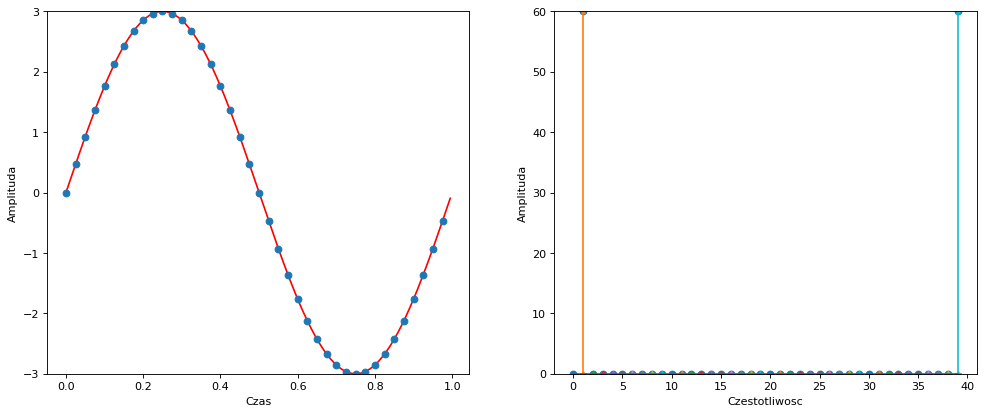

In [115]:
# f=1, A=3, LP=1
makeSignal(f=1.0,A=3.0,LP=1.0)

g) Ile punktów jest na wykresach przy częstotliwości próbkowania 50Hz, T=1s? Zwiększ dwukrotnie liczbę próbek poprzez zwiększenie częstotliwości próbkowania. Następnie: dla $sin(2*pi*f*t)$ porównaj wartość na osi OY spektrum uzyskane w tym oraz poprzednim punkcie.

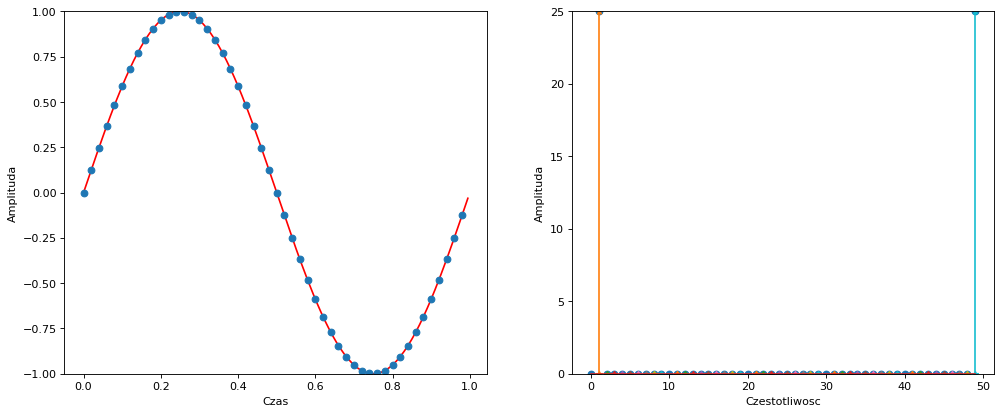

In [116]:
# f=1, w=50, LP=1
makeSignal(f=1.0,w=50.0,LP=1.0)

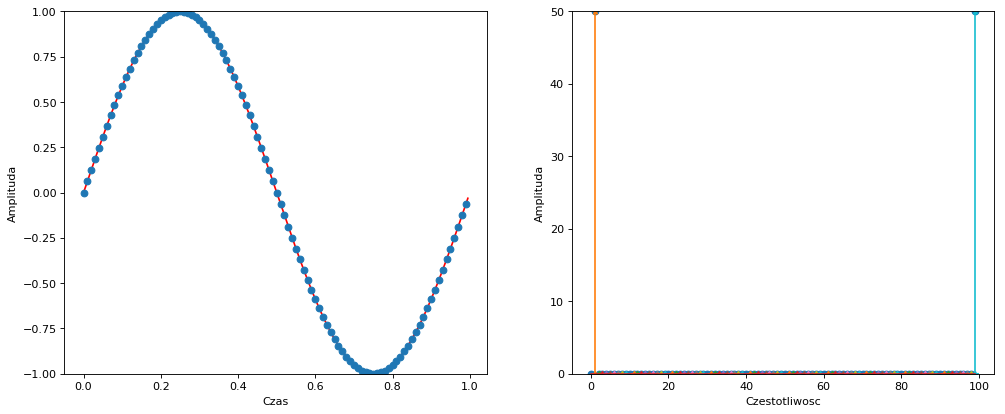

In [117]:
# f=1, w=100, LP=1
makeSignal(f=1.0,w=100.0,LP=1.0)

h) Na podstawie wyników uzyskanych w dwóch poprzednich punktach przeskaluj oś OY spektrum tak, aby wskazywała wartości amplitud badanych sygnałów. Sprawdź wyniki dla kilku wybranych funkcji.

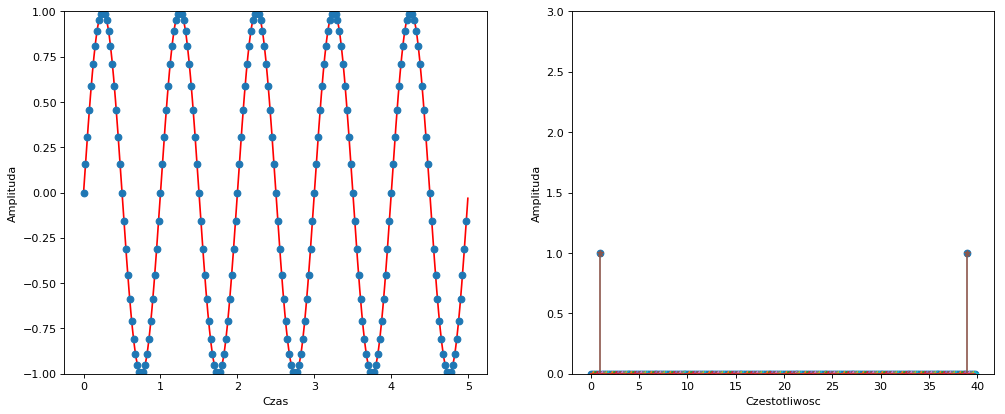

In [118]:
# popraw oś OX
def makeSignal(A=1, LP=1, w=40, f=2.0):
    T = 1.0/f        
    TW = 1.0/w        
    t = np.arange(0, LP*T, TW)
    n = len(t)

    FUNC = lambda t : A*sin(2*pi*t*f)    

    signal = FUNC(t)         
    fig = plt.figure(figsize=(15, 6), dpi=80)   
    ax = fig.add_subplot(121)
    ## --- POMOCNICZY SYGNAL
    base_t = np.arange(0, LP*T, 1.0/200.0)
    base_signal = FUNC(base_t)
    ax.plot(base_t, base_signal, linestyle='-', color='red')
    ax.set_ylim([min(base_signal), max(base_signal)])
    ## --- 
    ax.plot(t, signal, 'o')

    ax.set_xlabel("Czas")
    ax.set_ylabel("Amplituda")
    
    signal1 = fft(signal)
    # sygnal w dziedzinie czestotliwosci 
    signal1 = abs(signal1) 
    signal1 = [x*2*f/(w*LP)  for x in signal1]
    # modul sygnalu

    freqs = np.arange(int(n))
    freqs = [x*w/n for x in freqs]


    ax = fig.add_subplot(122)
    ymax = max(signal1)
    if (ymax > 3.0):
        ax.set_ylim([0.0,ymax])
    else:
        ax.set_ylim([0.0,3.0])
    stem(freqs, signal1, '-*')
    
    ax.set_xlabel("Czestotliwosc")
    ax.set_ylabel("Amplituda")

    show()

makeSignal(f=1.0, LP=5)# popraw oś OY

# Zadanie 2

a) Wygeneruj spektrum dla funkcji sinus o częstotliwościach 5Hz i 21Hz, dla czestotliwości próbkowania 20Hz i 20 (LP=20) analizowanych przebiegów. Czy rozpoznajesz te funkcje patrząc na ich spróbkowane wykresy? Odczytaj w drugim przypadku uzyskaną częstotliwość z FFT. Dlaczego uzyskano taki wynik?

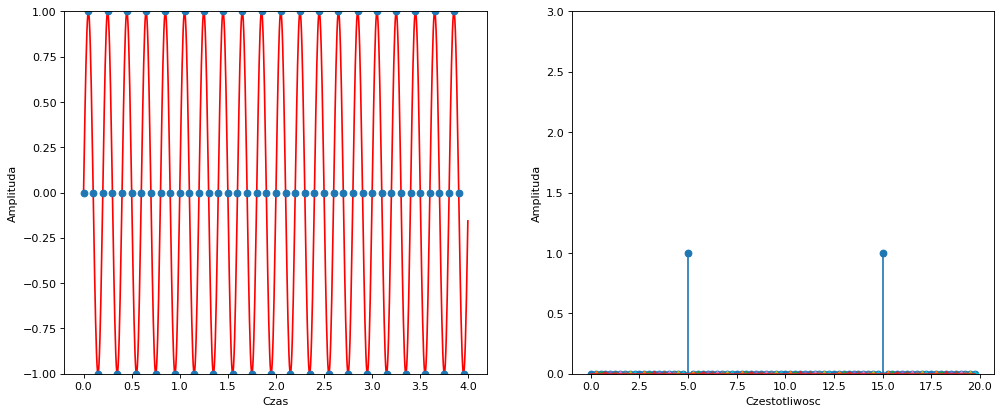

In [119]:
# f=5, w=20, LP=20
makeSignal(f=5.0, LP=20, w=20)

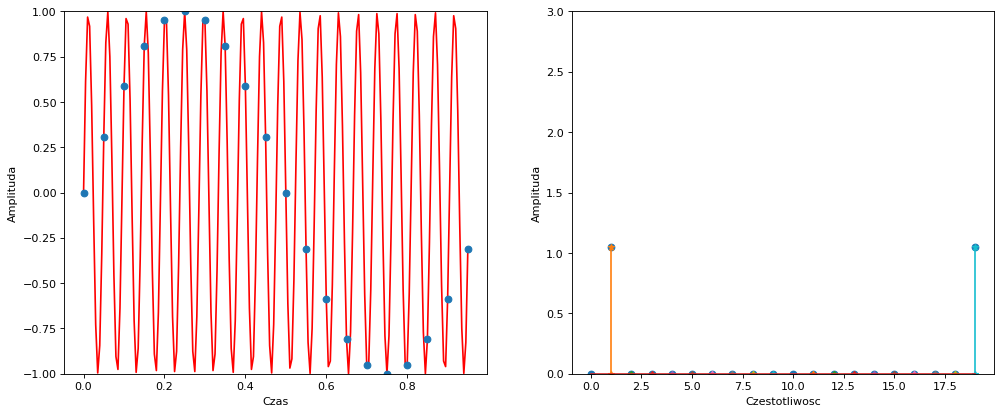

In [120]:
# f=21, w=20, LP=20
makeSignal(f=21.0, LP=20, w=20)

Zwróć uwagę, że spektrum jest symetryczne (poza pierwszym elementem).

b) Przy w=100Hz, przeanalizuj widma sygnałów:

i) $sin(2*pi*t*f)$, $f=10Hz$

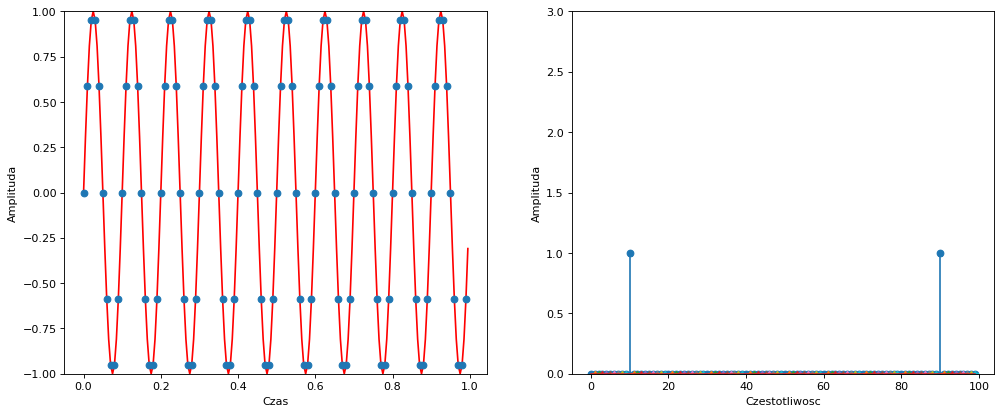

In [121]:
# f=10, w=100, A=1, LP=10
makeSignal(f=10, w=100, A=1, LP=10)

ii) $sin(2*pi*t*f)$, $f=20Hz$

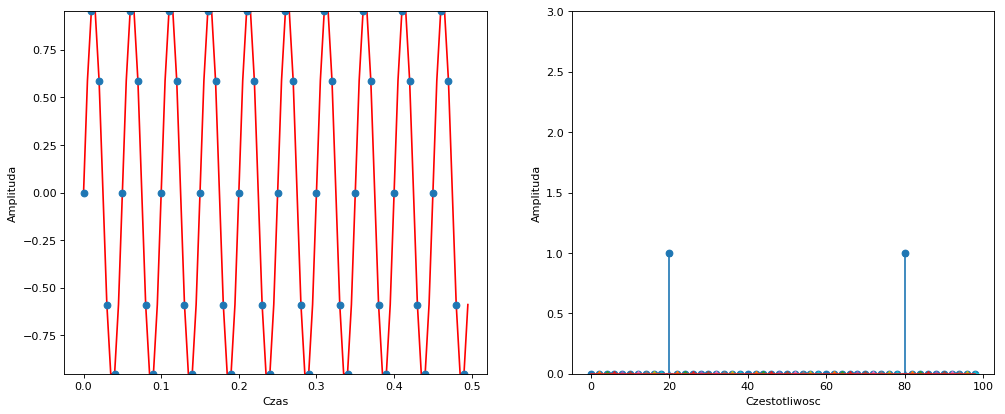

In [122]:
# f=20, w=100, A=1, LP=10
makeSignal(f=20, w=100, A=1, LP=10)

iii) $sin(2*pi*t*f)$, $f=30Hz$ (tutaj słupki nie będą wyglądać idealnie; dlaczego?)

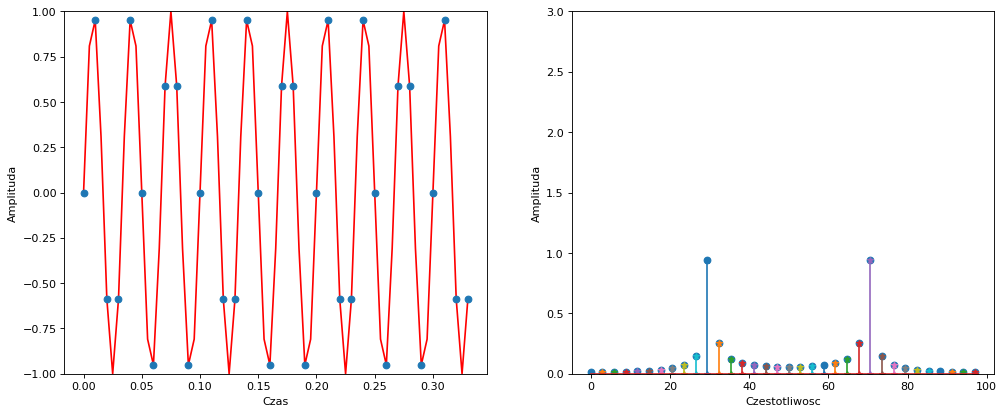

In [123]:
# f=30, w=100, A=1, LP=10
makeSignal(f=30, w=100, A=1, LP=10)

iv) $sin(2*pi*t*f)$, $f=40Hz$

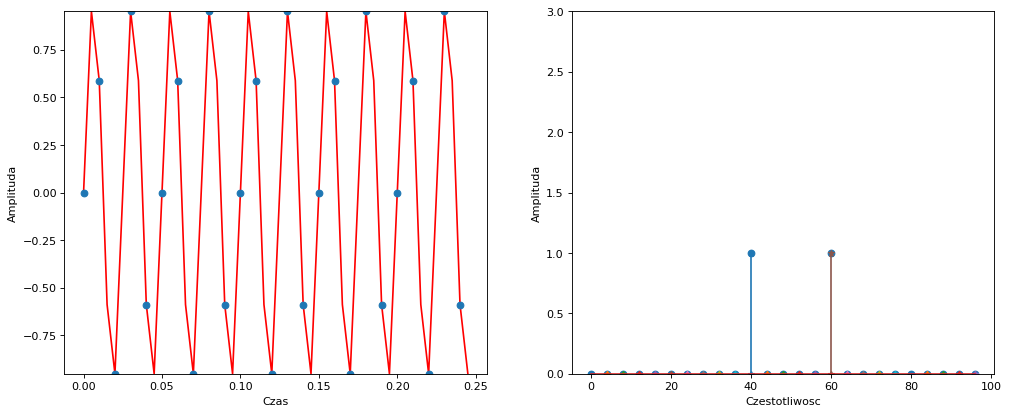

In [124]:
# f=40, w=100, A=1, LP=10
makeSignal(f=40, w=100, A=1, LP=10)

c) Przy F=50Hz, w=100Hz, wygeneruj spektrum dla $sin(2*pi*f*t)$. Zwróć uwagę na skalę wykresów.

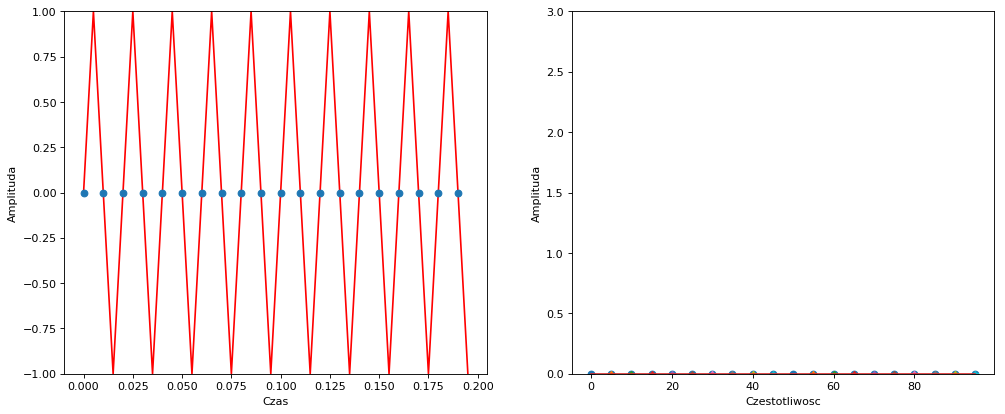

In [125]:
# f=50, w=100, A=1, LP=10
makeSignal(f=50, w=100, A=1, LP=10)

c) Jak się nazywa twierdzenie, którego konsekwencją jest takie zachowanie się spektrum?

# Zadanie 3

Poniższe przypadki skłądają się z złożonych sygnałów. Trzeba teraz będzie zmodyfikować trochę FUNC

a) $sin(2*pi*t*f) + 2*sin(4*pi*t*f)$, T=1s, w=20Hz.

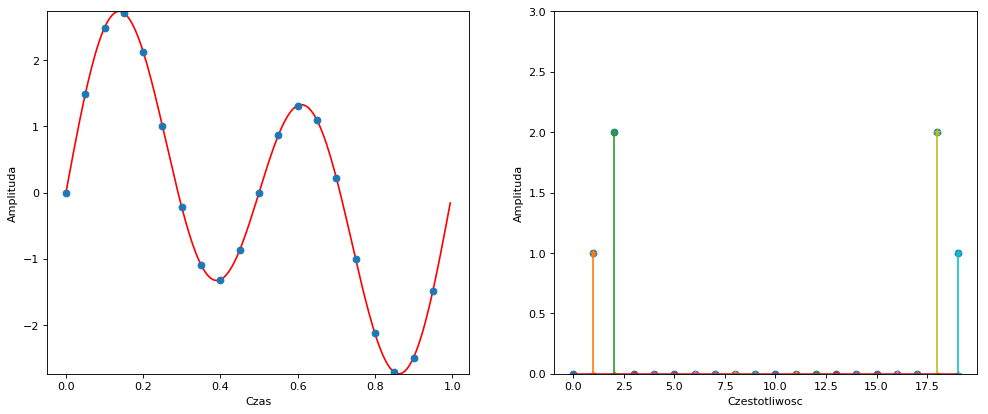

In [126]:
# Zdefiniuj funckję
def makeSignal2(A=1,LP=1,w=20,f=1):

    T = 1.0/f       
    # Okres sygnalu [s] (jak długo trwa jeden przebieg sinusa)

    TW = 1.0/w      
    # Okres probkowania [s] (co ile sekund pobieramy próbkę)

    t = np.arange(0, LP*T, TW)
    # generujemy momenty, w których pobieramy próbki

    n = len(t)

    FUNC = lambda t : (A*sin(2*pi*t*f))+(2*A*sin(4*pi*t*f))   
    # def. funkcji (tutaj sinus)

    signal = FUNC(t)   
    # funkcja sprobkowana

    fig = plt.figure(figsize=(15, 6), dpi=80)   
    ax = fig.add_subplot(121)
    ## --- POMOCNICZY SYGNAL
    base_t = np.arange(0, LP*T, 1.0/200.0)
    base_signal = FUNC(base_t)
    ax.plot(base_t, base_signal, linestyle='-', color='red')
    ax.set_ylim([min(base_signal), max(base_signal)])
    ## --- 
    ax.plot(t, signal, 'o')

    signal1 = fft(signal)
    # sygnal w dziedzinie czestotliwosci 
    signal1 = abs(signal1)    
    signal1 = [x*2*f/(w*LP)  for x in signal1]
    # modul sygnalu

    freqs = range(int(n))
    freqs = [ x / n * w for x in freqs ]


    ax.set_xlabel("Czas")
    ax.set_ylabel("Amplituda")
    ax = fig.add_subplot(122)
    ymax = max(signal1)
    if (ymax > 3.0):
        ax.set_ylim([0.0,ymax])
    else:
        ax.set_ylim([0.0,3.0])
    stem(freqs, signal1, '-*')

    ax.set_xlabel("Czestotliwosc")
    ax.set_ylabel("Amplituda")

    show()
makeSignal2()

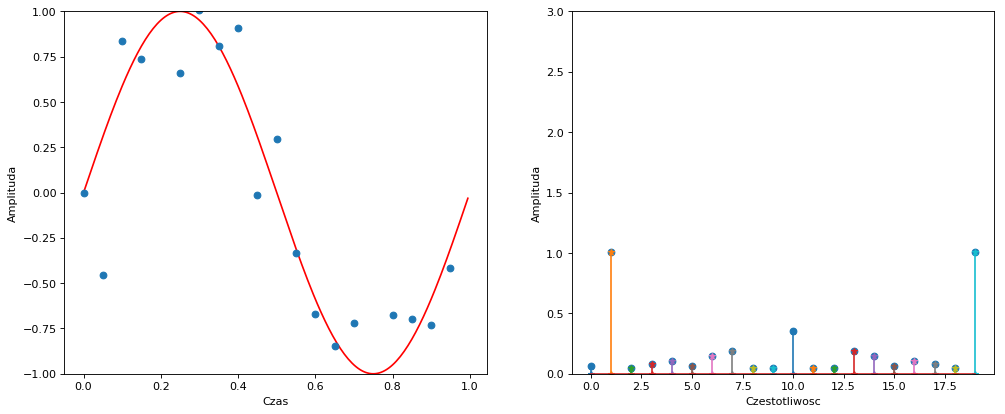

In [127]:
# Zdefiniuj funckję
    
    
def makeSignal2(A=1,LP=1,w=20,f=1):

    T = 1.0/f       
    # Okres sygnalu [s] (jak długo trwa jeden przebieg sinusa)

    TW = 1.0/w      
    # Okres probkowania [s] (co ile sekund pobieramy próbkę)

    t = np.arange(0, LP*T, TW)
    # generujemy momenty, w których pobieramy próbki

    n = len(t)

    FUNC = lambda t : (A*sin(2*pi*t*f))
    # def. funkcji (tutaj sinus)
                       
    FUNC2 = lambda t, Am, fr, mod : (Am*sin((2*pi+mod)*t*fr))

    signal = FUNC(t)   
    for x in range(100):
        szum = FUNC2(t, (random.random()*0.06 + 0.02), (random.random()*5 + 5), 
                       random.random()*2*pi)
        signal += szum
    # funkcja sprobkowana

    fig = plt.figure(figsize=(15, 6), dpi=80)   
    ax = fig.add_subplot(121)
    ## --- POMOCNICZY SYGNAL
    base_t = np.arange(0, LP*T, 1.0/200.0)
    base_signal = FUNC(base_t)
    ax.plot(base_t, base_signal, linestyle='-', color='red')
    ax.set_ylim([min(base_signal), max(base_signal)])
    ## --- 
    ax.plot(t, signal, 'o')

    signal1 = fft(signal)
    # sygnal w dziedzinie czestotliwosci 
    signal1 = abs(signal1)    
    signal1 = [x*2*f/(w*LP)  for x in signal1]
    # modul sygnalu

    freqs = range(int(n))
    freqs = [ x / n * w for x in freqs ]


    ax.set_xlabel("Czas")
    ax.set_ylabel("Amplituda")
    ax = fig.add_subplot(122)
    ymax = max(signal1)
    if (ymax > 3.0):
        ax.set_ylim([0.0,ymax])
    else:
        ax.set_ylim([0.0,3.0])
    stem(freqs, signal1, '-*')

    ax.set_xlabel("Czestotliwosc")
    ax.set_ylabel("Amplituda")

    show()
makeSignal2()

d) $0.5 + 2*sin(2*pi*t*f)$, T=1s, w=20Hz. Czy amplituda zerowego prążka jest prawidłowa? Dlaczego? (Podpowiedź: zwróć jeszcze raz uwagę na “symetrię” spektrum).

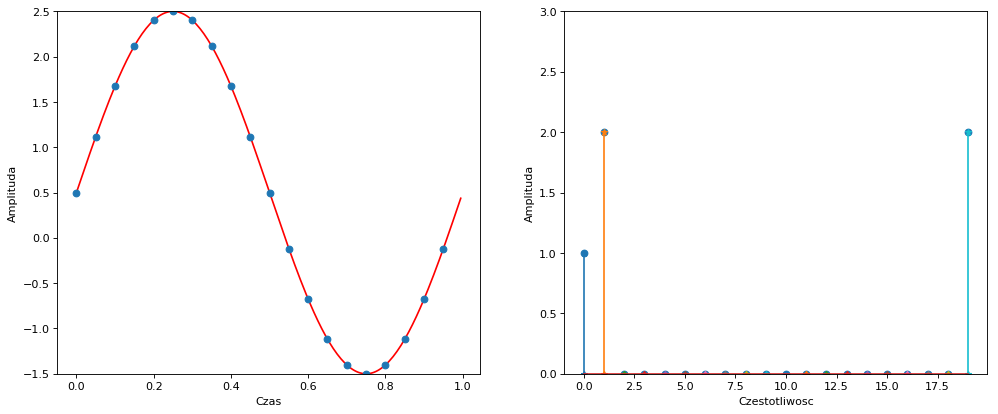

In [128]:
# Wyrysuj sygnał
def makeSignal2(A=1,LP=1,w=20,f=1):

    T = 1.0/f       
    # Okres sygnalu [s] (jak długo trwa jeden przebieg sinusa)

    TW = 1.0/w      
    # Okres probkowania [s] (co ile sekund pobieramy próbkę)

    t = np.arange(0, LP*T, TW)
    # generujemy momenty, w których pobieramy próbki

    n = len(t)

    FUNC = lambda t : (0.5 + (A*sin(2*pi*t*f)))
    # def. funkcji (tutaj sinus)

    signal = FUNC(t)
    # funkcja sprobkowana

    fig = plt.figure(figsize=(15, 6), dpi=80)   
    ax = fig.add_subplot(121)
    ## --- POMOCNICZY SYGNAL
    base_t = np.arange(0, LP*T, 1.0/200.0)
    base_signal = FUNC(base_t)
    ax.plot(base_t, base_signal, linestyle='-', color='red')
    ax.set_ylim([min(base_signal), max(base_signal)])
    ## --- 
    ax.plot(t, signal, 'o')

    signal1 = fft(signal)
    # sygnal w dziedzinie czestotliwosci 
    signal1 = abs(signal1)    
    signal1 = [x*2*f/(w*LP)  for x in signal1]
    # modul sygnalu

    freqs = range(int(n))
    freqs = [ x / n * w for x in freqs ]


    ax.set_xlabel("Czas")
    ax.set_ylabel("Amplituda")
    ax = fig.add_subplot(122)
    ymax = max(signal1)
    if (ymax > 3.0):
        ax.set_ylim([0.0,ymax])
    else:
        ax.set_ylim([0.0,3.0])
    stem(freqs, signal1, '-*')

    ax.set_xlabel("Czestotliwosc")
    ax.set_ylabel("Amplituda")

    show()
makeSignal2(A=2)


e) $sin(2*pi*t*f)$ oraz $sin(2*pi*t*f + pi/4)$ dla T=1s, w=20Hz. Czy informacja o fazie zniknęła? Poszukaj śladów tej informacji w tablicy, będącej wynikiem operacji fft(signal). (funkcja angle(sygnal, deg=True)

[ 180.          -90.          130.83766074 -122.53310984  140.84246652
 -101.29821713   -9.35110142    0.           32.44345812  143.16816131
  180.         -146.93145747  -32.44345812  -36.66669068    9.35110142
   69.88355224 -140.84246652  106.75370281 -130.83766074   90.        ]


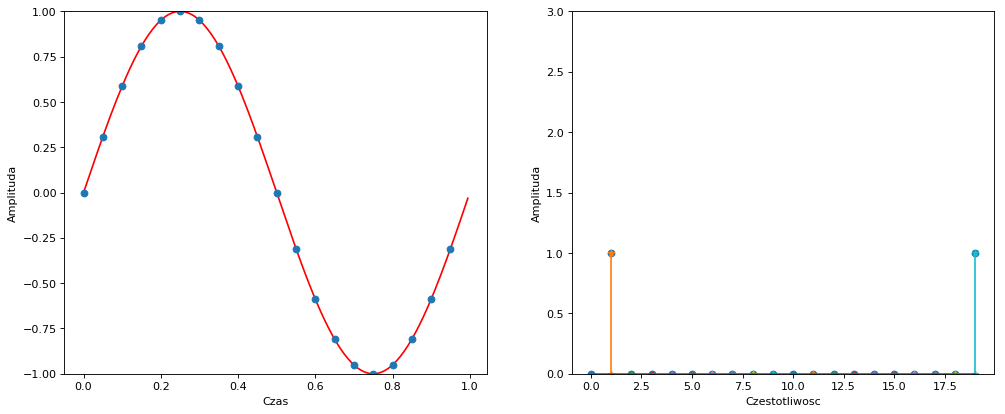

In [129]:
# faza = 0
def makeSignal2(A=1,LP=1,w=20,f=1):

    T = 1.0/f       
    # Okres sygnalu [s] (jak długo trwa jeden przebieg sinusa)

    TW = 1.0/w      
    # Okres probkowania [s] (co ile sekund pobieramy próbkę)

    t = np.arange(0, LP*T, TW)
    # generujemy momenty, w których pobieramy próbki

    n = len(t)

    FUNC = lambda t : (A*sin(2*pi*t*f))
    # def. funkcji (tutaj sinus)

    signal = FUNC(t)
    # funkcja sprobkowana

    fig = plt.figure(figsize=(15, 6), dpi=80)   
    ax = fig.add_subplot(121)
    ## --- POMOCNICZY SYGNAL
    base_t = np.arange(0, LP*T, 1.0/200.0)
    base_signal = FUNC(base_t)
    ax.plot(base_t, base_signal, linestyle='-', color='red')
    ax.set_ylim([min(base_signal), max(base_signal)])
    ## --- 
    ax.plot(t, signal, 'o')

    signal1 = fft(signal)
    print(angle(signal1, deg=True))
    # sygnal w dziedzinie czestotliwosci 
    signal1 = abs(signal1)    
    signal1 = [x*2*f/(w*LP)  for x in signal1]
    # modul sygnalu

    freqs = range(int(n))
    freqs = [ x / n * w for x in freqs ]


    ax.set_xlabel("Czas")
    ax.set_ylabel("Amplituda")
    ax = fig.add_subplot(122)
    ymax = max(signal1)
    if (ymax > 3.0):
        ax.set_ylim([0.0,ymax])
    else:
        ax.set_ylim([0.0,3.0])
    stem(freqs, signal1, '-*')

    ax.set_xlabel("Czestotliwosc")
    ax.set_ylabel("Amplituda")

    show()
makeSignal2()



[   0.          -45.          120.95327032  180.         -179.38583631
 -104.91649154   -7.65108757   26.56505118   47.37236697 -173.19837096
  180.         -143.13010235  -47.37236697   -7.23902006    7.65108757
   90.          179.38583631  179.11534756 -120.95327032   45.        ]


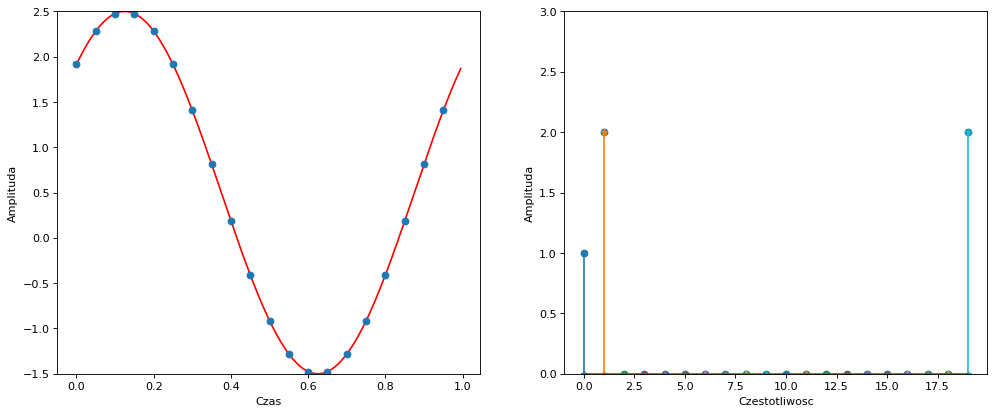

In [130]:
# faza = pi/4
def makeSignal2(A=1,LP=1,w=20,f=1):

    T = 1.0/f       
    # Okres sygnalu [s] (jak długo trwa jeden przebieg sinusa)

    TW = 1.0/w      
    # Okres probkowania [s] (co ile sekund pobieramy próbkę)

    t = np.arange(0, LP*T, TW)
    # generujemy momenty, w których pobieramy próbki

    n = len(t)

    FUNC = lambda t : (0.5 + (A*sin(2*pi*t*f + (pi/4.0))))
    # def. funkcji (tutaj sinus)

    signal = FUNC(t)
    # funkcja sprobkowana

    fig = plt.figure(figsize=(15, 6), dpi=80)   
    ax = fig.add_subplot(121)
    ## --- POMOCNICZY SYGNAL
    base_t = np.arange(0, LP*T, 1.0/200.0)
    base_signal = FUNC(base_t)
    ax.plot(base_t, base_signal, linestyle='-', color='red')
    ax.set_ylim([min(base_signal), max(base_signal)])
    ## --- 
    ax.plot(t, signal, 'o')

    signal1 = fft(signal)
    print(angle(signal1, deg=True))
    # sygnal w dziedzinie czestotliwosci 
    signal1 = abs(signal1)    
    signal1 = [x*2*f/(w*LP)  for x in signal1]
    # modul sygnalu

    freqs = range(int(n))
    freqs = [ x / n * w for x in freqs ]


    ax.set_xlabel("Czas")
    ax.set_ylabel("Amplituda")
    ax = fig.add_subplot(122)
    ymax = max(signal1)
    if (ymax > 3.0):
        ax.set_ylim([0.0,ymax])
    else:
        ax.set_ylim([0.0,3.0])
    stem(freqs, signal1, '-*')

    ax.set_xlabel("Czestotliwosc")
    ax.set_ylabel("Amplituda")

    show()
makeSignal2(A=2)


# Zadanie 4

Oblicz wynik ifft(fft(x)), gdzie x=random.random(10). Czy jakaś informacja została stracona?

In [131]:
# wygeneruj wektor x
x = random.random(10)
ifft(fft(x))

array([0.2788671 +5.55111512e-18j, 0.71729622+0.00000000e+00j,
       0.04009792+7.18254692e-18j, 0.42317962+2.37060917e-18j,
       0.56305188+2.91140302e-18j, 0.54649085-1.62483970e-17j,
       0.97341177+8.19082723e-18j, 0.38020464-1.62483970e-17j,
       0.74654955+3.91968332e-18j, 0.1789479 +2.37060917e-18j])

In [132]:
# oblicz fft z x
fft(x)

array([ 4.84809745+0.00000000e+00j, -0.79074418+5.55774076e-01j,
        0.2907433 -4.61773223e-01j, -0.05624469-5.11706007e-01j,
       -0.65139716-1.27038375e+00j,  0.35585899+5.55111512e-17j,
       -0.65139716+1.27038375e+00j, -0.05624469+5.11706007e-01j,
        0.2907433 +4.61773223e-01j, -0.79074418-5.55774076e-01j])

In [133]:
# oblicz ifft
ifft(x)

array([ 0.48480974+0.00000000e+00j, -0.07907442-5.55774076e-02j,
        0.02907433+4.61773223e-02j, -0.00562447+5.11706007e-02j,
       -0.06513972+1.27038375e-01j,  0.0355859 -5.55111512e-18j,
       -0.06513972-1.27038375e-01j, -0.00562447-5.11706007e-02j,
        0.02907433-4.61773223e-02j, -0.07907442+5.55774076e-02j])

In [134]:
#porownaj x z ifft(fft(x)), wystarczy print

In [135]:
print(x)
print('\n\n\n')
print(ifft(fft(x)))

[0.2788671  0.71729622 0.04009792 0.42317962 0.56305188 0.54649085
 0.97341177 0.38020464 0.74654955 0.1789479 ]




[0.2788671 +5.55111512e-18j 0.71729622+0.00000000e+00j
 0.04009792+7.18254692e-18j 0.42317962+2.37060917e-18j
 0.56305188+2.91140302e-18j 0.54649085-1.62483970e-17j
 0.97341177+8.19082723e-18j 0.38020464-1.62483970e-17j
 0.74654955+3.91968332e-18j 0.1789479 +2.37060917e-18j]
